Importing the required packages for pre-processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import nltk
import re
from nltk.stem import WordNetLemmatizer
import warnings

In [2]:
df = pd.read_csv('RedditData.csv')

Data Exploration of the given dataset

In [3]:
df.head()

,Unnamed: 0,title,id,author,url,score,subreddit,over_18,selftext
0,0,It’s kinda funny how quickly one can go from “...,ma96y1,cwbrumm,https://www.reddit.com/r/SuicideWatch/comments...,3802,SuicideWatch,False,NaN
1,1,“If you truly wanted to kill yourself and wasn...,greo4o,Oels2,https://www.reddit.com/r/SuicideWatch/comments...,3376,SuicideWatch,False,"Yeah because I DONT WANT TO FUCKING DO IT, but..."
2,2,Anyone else not want to die and not want to ki...,f9d5go,cleopatra_97,https://www.reddit.com/r/SuicideWatch/comments...,3029,SuicideWatch,False,NaN
3,3,My mom died 3 hours ago,kbqsnq,_crustysocks_,https://www.reddit.com/r/SuicideWatch/comments...,2867,SuicideWatch,False,I thought id be ready for this some day but i ...
4,4,Raped in front of my girlfriend. feeling like ...,e8gjky,Fantastic-Profession,https://www.reddit.com/r/SuicideWatch/comments...,2821,SuicideWatch,False,"\n\nI don't know what to say or do, I just fe..."


In [4]:
df = df.drop(['Unnamed: 0'], axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3916 entries, 0 to 3915
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      3916 non-null   object
 1   id         3916 non-null   object
 2   author     3645 non-null   object
 3   url        3916 non-null   object
 4   score      3916 non-null   int64 
 5   subreddit  3916 non-null   object
 6   over_18    3916 non-null   bool  
 7   selftext   3679 non-null   object
dtypes: bool(1), int64(1), object(6)
memory usage: 218.1+ KB


In [6]:
df.columns

Index(['title', 'id', 'author', 'url', 'score', 'subreddit', 'over_18',
       'selftext'],
      dtype='object')

In [7]:
df.size

31328

In [8]:
df.shape

(3916, 8)

#### Now , we're adding label to our features. If the post is from subreddit 'SuicideWatch' then we label it as is_suicide = 1 or if the post is from subreddit 'depression' we label it as is_suicide = 0

In [9]:
df['is_suicide'] = np.where(df['subreddit']== 'SuicideWatch', 1, 0)
df.head()

,title,id,author,url,score,subreddit,over_18,selftext,is_suicide
0,It’s kinda funny how quickly one can go from “...,ma96y1,cwbrumm,https://www.reddit.com/r/SuicideWatch/comments...,3802,SuicideWatch,False,NaN,1
1,“If you truly wanted to kill yourself and wasn...,greo4o,Oels2,https://www.reddit.com/r/SuicideWatch/comments...,3376,SuicideWatch,False,"Yeah because I DONT WANT TO FUCKING DO IT, but...",1
2,Anyone else not want to die and not want to ki...,f9d5go,cleopatra_97,https://www.reddit.com/r/SuicideWatch/comments...,3029,SuicideWatch,False,NaN,1
3,My mom died 3 hours ago,kbqsnq,_crustysocks_,https://www.reddit.com/r/SuicideWatch/comments...,2867,SuicideWatch,False,I thought id be ready for this some day but i ...,1
4,Raped in front of my girlfriend. feeling like ...,e8gjky,Fantastic-Profession,https://www.reddit.com/r/SuicideWatch/comments...,2821,SuicideWatch,False,"\n\nI don't know what to say or do, I just fe...",1


In [10]:
df.isnull().sum()

title           0
id              0
author        271
url             0
score           0
subreddit       0
over_18         0
selftext      237
is_suicide      0
dtype: int64

### EDA:

#### a) Seems like some of the posts are empty so we'll replace those with string 'empty post'

In [11]:
df["is_suicide"][df["selftext"].isnull()].value_counts()

1    198
0     39
Name: is_suicide, dtype: int64

In [12]:
# Filling the NULL posts with 'empty post'
df["selftext"].fillna("empty post",inplace=True)
df[df["selftext"].isin(["empty post"])].head()

,title,id,author,url,score,subreddit,over_18,selftext,is_suicide
0,It’s kinda funny how quickly one can go from “...,ma96y1,cwbrumm,https://www.reddit.com/r/SuicideWatch/comments...,3802,SuicideWatch,False,empty post,1
2,Anyone else not want to die and not want to ki...,f9d5go,cleopatra_97,https://www.reddit.com/r/SuicideWatch/comments...,3029,SuicideWatch,False,empty post,1
6,I like sleeping because it's the closest thing...,juklnk,throwwowwoy,https://www.reddit.com/r/SuicideWatch/comments...,2769,SuicideWatch,False,empty post,1
9,"Dear mom, i really dont care about my grades r...",kgxxg9,NaN,https://www.reddit.com/r/SuicideWatch/comments...,2652,SuicideWatch,False,empty post,1
11,I’m starting to feel like I’m meant to commit ...,b4gsy8,hddineejbe,https://www.reddit.com/r/SuicideWatch/comments...,2541,SuicideWatch,False,empty post,1


#### b) Now we'll check if there are some Duplicate posts in our dataframe. We'll check the title of the post for the duplicate entries.

In [13]:
series_of_title = pd.Series(df['title'].tolist() )
unique_titles = len(np.unique(series_of_title))
title_more_than_once = np.sum(series_of_title.value_counts() > 1)

print ('Total number of  Unique Titles are: {}\n'.format(unique_titles))

print ('Number of titles that appear more than one time: {} ({}%)\n'.format(title_more_than_once,title_more_than_once/unique_titles*100))

print ('Max number of times a same title is repeated: {}\n'.format(max(series_of_title.value_counts()))) 

q_vals=series_of_title.value_counts()

q_vals=q_vals.values

Total number of  Unique Titles are: 3857

Number of titles that appear more than one time: 50 (1.2963443090484832%)

Max number of times a same title is repeated: 4



#### c) Distribution of data points among labels:

<AxesSubplot:xlabel='is_suicide'>

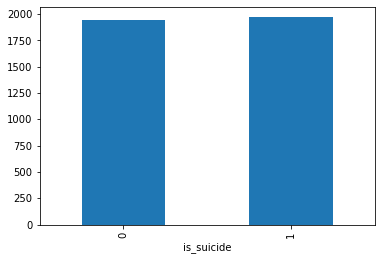

In [14]:
df.groupby("is_suicide")['id'].count().plot.bar()

so this is a balanced dataset.

### Pre-Processing of Data:

For data pre-processing we: 

    - Converted text to lowercase 
    - Removing Punctuations
    - Performing lemmatization
    - Removing Stopwords
    - Expanding contractions etc.

In [15]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords


STOP_WORDS = stopwords.words("english")
lemmatizer = WordNetLemmatizer()

def preprocessing(x):
    
    lista = []
    tokenizer = RegexpTokenizer(r'(\w+)')
    for i in range(len(x)):
        #Lowercase
        a = (x)[i].lower()
        print(a)
        # removing Contraction
        a = a.replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                           .replace("ain't", "are not")
        
        b = tokenizer.tokenize(a) #without punctuation
        print(b)
        c = [lemmatizer.lemmatize(i) for i in b] #Lemmatization
        d = [i for i in c if i not in STOP_WORDS] #removing stop - words
        #RETURN SEPERATED WORDS INTO LONG STRING
        clean_text = " ".join(word for word in d)
        lista.append(clean_text)
        
    return lista

In [16]:
df["title_clean"] = preprocessing(df["title"])
df["selftext_clean"] = preprocessing(df["selftext"])
pd.set_option("display.max_colwidth", 100)
df.head()

it’s kinda funny how quickly one can go from “today was a great, productive day” to “i wish i had the courage to just fucking end it already”.
['it', 's', 'kinda', 'funny', 'how', 'quickly', 'one', 'can', 'go', 'from', 'today', 'was', 'a', 'great', 'productive', 'day', 'to', 'i', 'wish', 'i', 'had', 'the', 'courage', 'to', 'just', 'fucking', 'end', 'it', 'already']
“if you truly wanted to kill yourself and wasn’t seeking attention, you’d just do it and tell no one so no one could stop you”
['if', 'you', 'truly', 'wanted', 'to', 'kill', 'yourself', 'and', 'wasn', 't', 'seeking', 'attention', 'you', 'd', 'just', 'do', 'it', 'and', 'tell', 'no', 'one', 'so', 'no', 'one', 'could', 'stop', 'you']
anyone else not want to die and not want to kill themselves but just wish they could just stop existing
['anyone', 'else', 'not', 'want', 'to', 'die', 'and', 'not', 'want', 'to', 'kill', 'themselves', 'but', 'just', 'wish', 'they', 'could', 'just', 'stop', 'existing']
my mom died 3 hours ago
['my',

being alive is fucking painful. i just want to go to sleep and never wake up.
['being', 'alive', 'is', 'fucking', 'painful', 'i', 'just', 'want', 'to', 'go', 'to', 'sleep', 'and', 'never', 'wake', 'up']
self-hatred is killing me. tried to cut myself again.
['self', 'hatred', 'is', 'killing', 'me', 'tried', 'to', 'cut', 'myself', 'again']
i would take a terminal illness from someone who actually wants to live.
['i', 'would', 'take', 'a', 'terminal', 'illness', 'from', 'someone', 'who', 'actually', 'wants', 'to', 'live']
people don't realize how just little acts of kindness just change so much.
['people', 'do', 'not', 'realize', 'how', 'just', 'little', 'acts', 'of', 'kindness', 'just', 'change', 'so', 'much']
thinking about this kid
['thinking', 'about', 'this', 'kid']
i wanna slit my fucking throat
['i', 'wanna', 'slit', 'my', 'fucking', 'throat']
fuck online school
['fuck', 'online', 'school']
i just want to finally die
['i', 'just', 'want', 'to', 'finally', 'die']
hanging myself toni

['hello', 'again']
i hate my life i hate my life i hate my life i hate my life i hate my life i hate my life i hate my life i hate my life i hate my life i hate my life i hate my life i hate my life i hate my life i hate my life i hate my life i hate my life i hate my life i hate my life i hate my life i hate my life
['i', 'hate', 'my', 'life', 'i', 'hate', 'my', 'life', 'i', 'hate', 'my', 'life', 'i', 'hate', 'my', 'life', 'i', 'hate', 'my', 'life', 'i', 'hate', 'my', 'life', 'i', 'hate', 'my', 'life', 'i', 'hate', 'my', 'life', 'i', 'hate', 'my', 'life', 'i', 'hate', 'my', 'life', 'i', 'hate', 'my', 'life', 'i', 'hate', 'my', 'life', 'i', 'hate', 'my', 'life', 'i', 'hate', 'my', 'life', 'i', 'hate', 'my', 'life', 'i', 'hate', 'my', 'life', 'i', 'hate', 'my', 'life', 'i', 'hate', 'my', 'life', 'i', 'hate', 'my', 'life', 'i', 'hate', 'my', 'life']
i can't ever have a good day can i?
['i', 'can', 'not', 'ever', 'have', 'a', 'good', 'day', 'can', 'i']
i just feel like a lost cause
['i', 

['fuck', 'new', 'years']
i just want to be passionate about something again
['i', 'just', 'want', 'to', 'be', 'passionate', 'about', 'something', 'again']
regular check-in post
['regular', 'check', 'in', 'post']
does anyone ever wonder how normal/healthy people work?
['does', 'anyone', 'ever', 'wonder', 'how', 'normal', 'healthy', 'people', 'work']
my dad is gone... forever
['my', 'dad', 'is', 'gone', 'forever']
does anyone else’s depression get worse when it starts to get late?
['does', 'anyone', 'else', 's', 'depression', 'get', 'worse', 'when', 'it', 'starts', 'to', 'get', 'late']
i got expelled from university
['i', 'got', 'expelled', 'from', 'university']
anyone else have no social life and just sits on the computer all day?
['anyone', 'else', 'have', 'no', 'social', 'life', 'and', 'just', 'sits', 'on', 'the', 'computer', 'all', 'day']
every day of my life.
['every', 'day', 'of', 'my', 'life']
i told him “no” and he got pissed.
['i', 'told', 'him', 'no', 'and', 'he', 'got', 'pisse

fear of depression
['fear', 'of', 'depression']
wanting to relapse
['wanting', 'to', 'relapse']
i’m in the midst of a major depression episode.
['i', 'm', 'in', 'the', 'midst', 'of', 'a', 'major', 'depression', 'episode']
i’m falling apart
['i', 'm', 'falling', 'apart']
depression won’t shift
['depression', 'won', 't', 'shift']
i hate that everyone thinks i‘m just lazy
['i', 'hate', 'that', 'everyone', 'thinks', 'i', 'm', 'just', 'lazy']
im extremely depressed. i reach out to people to make plans and they always end up either bailing, never giving me a definite answer, telling me what they’re doing but never inviting, or leaving me on hold for an undetermined amount of time.
['im', 'extremely', 'depressed', 'i', 'reach', 'out', 'to', 'people', 'to', 'make', 'plans', 'and', 'they', 'always', 'end', 'up', 'either', 'bailing', 'never', 'giving', 'me', 'a', 'definite', 'answer', 'telling', 'me', 'what', 'they', 're', 'doing', 'but', 'never', 'inviting', 'or', 'leaving', 'me', 'on', 'hold',

“college is the best four years of your life.” = in this pandemic?
['it', 's', 'just', 'a', 'number', 'if', 'only', 'that', 'was', 'true', 'you', 'need', 'to', 'work', 'harder', 'i', 'gave', 'up', 'a', 'meal', 'a', 'day', 'gym', 'video', 'games', 'and', 'going', 'outside', 'just', 'to', 'study', 'you', 'chose', 'this', 'path', 'i', 'did', 'now', 'i', 'want', 'to', 'leave', 'it', 'forever', 'and', 'it', 's', 'too', 'late', 'to', 'change', 'majors', 'why', 'don', 't', 'you', 'talk', 'to', 'the', 'school', 'counselor', 'because', 'they', 're', 'expecting', 'me', 'to', 'pay', '5', 'up', 'front', 'per', 'visit', 'which', 'is', 'not', 'only', 'financially', 'crippling', 'but', 'also', 'morally', 'reprehensible', 'your', 'friends', 'and', 'family', 'will', 'miss', 'you', 'i', 'have', 'no', 'friends', 'and', 'my', 'family', 'told', 'me', 'to', 'jump', 'off', 'the', 'roof', 'and', 'it', 's', 'not', 'like', 'i', 'll', 'be', 'around', 'for', 'their', 'mourning', 'college', 'is', 'the', 'best', 'f

- albert camus
['the', 'literall', 'meaning', 'of', 'life', 'is', 'whatever', 'you', 'are', 'doing', 'that', 'prevents', 'you', 'from', 'killing', 'yourself', 'albert', 'camus']
empty post
['empty', 'post']
i am mystified by people who have an inherent, strong urge to live. people in horrific, oppressive, inescapable situations who just... keep living? who do not off themselves? that boggles my mind. 

i've been suicidal for so long that killing myself has become a potential answer to every problem or question or stressor, an advocate for death in the back of my mind. 
constantly. even when i've been in better patches, that part of me still breathes these questions into my mind.

"but what if we just stopped existing?" 
"is my existence *really* worthwhile?"
"does your life have any real meaning?"
"why are you still alive?"

healthy brains just don't fucking ask those questions incessantly. they don't have existential crises in response to every little task.

there is something so fund

edit: i didn’t expect this post to be so huge but appreciate everyone’s response, help and stories. i kinda made it through the night and talked to my therapist. the thoughts are still there loudly as ever but i don’t think i will commit suicide within the next days. thank you everyone for reaching out to me. i hope you guys find hope and something to make your day better. really. thank you a lot. reading all the comments and talking to some of you people helped me immense in distracting myself. i wish you the best. (i’m still here for anyone who wants to talk and wants to suffer together tho) please continue to help others in need
['i', 'want', 'to', 'die', 'i', 'want', 'to', 'stop', 'thinking', 'i', 'want', 'to', 'stop', 'hurting', 'i', 'want', 'to', 'die', 'i', 'just', 'had', 'to', 'tell', 'someone', 'anyone', 'because', 'i', 'can', 't', 'tell', 'anyone', 'else', 'edit', 'i', 'didn', 't', 'expect', 'this', 'post', 'to', 'be', 'so', 'huge', 'but', 'appreciate', 'everyone', 's', 'resp

but anything else and i will be ostracized. anything out of my mouth is an excuse to hurt me. i am sorry i exist in a world with other people.
['but', 'anything', 'else', 'and', 'i', 'will', 'be', 'ostracized', 'anything', 'out', 'of', 'my', 'mouth', 'is', 'an', 'excuse', 'to', 'hurt', 'me', 'i', 'am', 'sorry', 'i', 'exist', 'in', 'a', 'world', 'with', 'other', 'people']
if you would see me, you would think i'm just a normal dude but i'm not. i'm a fucking monster. thats why i'm gonna die alone. noone likes an ugly, hairy and evil guy. i'm so messed up man. i try to be good but its like its not in my nature. i have to act like a completely different person if i wanna succeed in life. but i can't do that. i already have a bunch of different personalities based on who i'm with. if there is a god i really hope he hasn't forgotten about his dysfunctional child. if he has then i might join him sooner or later
['if', 'you', 'would', 'see', 'me', 'you', 'would', 'think', 'i', 'am', 'just', 'a

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




['everynight', 'is', 'the', 'same', 'shit', 'over', 'and', 'over', 'drugs', 'alcohol', 'and', 'trying', 'to', 'escape', 'i', 'keep', 'remembering', 'my', 'sister', 'own', 'funeral', 'i', 'keep', 'remembering', 'holding', 'her', 'dead', 'baby', 'she', 'did', 'not', 'deserve', 'this', 'shit', 'i', 'do', 'not', 'want', 'to', 'hear', 'any', 'heaven', 'bullshit', 'either', 'i', 'just', 'want', 'to', 'end', 'it', 'all', 'and', 'it', 'd', 'that', 'simple', 'it', 'is', 'just', 'that', 'hard', 'and', 'honestly', 'i', 'do', 'not', 'have', 'much', 'to', 'lose', 'i', 'just', 'want', 'to', 'fade', 'into', 'the', 'eternal', 'darkness', 'and', 'never', 'return', 'i', 'do', 'not', 'enjoy', 'living', 'anymore', 'sorry', 'a', 'little', 'drunk', 'and', 'pissed', 'right', 'now']
what do you eat when nothing tastes good? i have no appetite and cannot keep weight on. i also don't like cooking.
['what', 'do', 'you', 'eat', 'when', 'nothing', 'tastes', 'good', 'i', 'have', 'no', 'appetite', 'and', 'can', 'no

['i', 'struggle', 'and', 'have', 'been', 'diagnosed', 'with', 'treat', 'resistant', 'major', 'depressive', 'disorder', 'the', 'treatment', 'resistant', 'was', 'a', 'big', 'blow', 'i', 'got', 'a', 'few', 'years', 'ago', 'i', 've', 'tried', 'a', 'couple', 'different', 'drugs', 'high', 'dose', 'low', 'dose', 'therapy', 'clinical', 'trial', 'etc', 'there', 's', 'a', 'huge', 'situational', 'component', 'for', 'sure', 'i', 'm', 'in', 'college', 'working', 'part', 'time', 'have', 'a', '9yo', 'and', 'a', 'fiancé', 'we', 'also', 'just', 'went', 'through', 'a', 'major', 'car', 'wreck', 'with', 'total', 'vehicle', 'loss', 'leaving', 'me', 'with', 'a', 'residual', 'injury', 'that', 'i', 'haven', 't', 'been', 'able', 'to', 'get', 'therapy', 'for', 'then', 'literally', '4', 'weeks', 'after', 'the', 'wreck', 'that', 'exacerbated', 'my', 'ptsd', 'we', 'found', 'bedbugs', 'in', 'our', 'apartment', 'and', 'have', 'been', 'working', 'through', 'the', 'psychological', 'terror', 'and', 'domestic', 'upheava

,title,id,author,url,score,subreddit,over_18,selftext,is_suicide,title_clean,selftext_clean
0,"It’s kinda funny how quickly one can go from “today was a great, productive day” to “I wish I ha...",ma96y1,cwbrumm,https://www.reddit.com/r/SuicideWatch/comments/ma96y1/its_kinda_funny_how_quickly_one_can_go_fro...,3802,SuicideWatch,False,empty post,1,kinda funny quickly one go today wa great productive day wish courage fucking end already,empty post
1,"“If you truly wanted to kill yourself and wasn’t seeking attention, you’d just do it and tell no...",greo4o,Oels2,https://www.reddit.com/r/SuicideWatch/comments/greo4o/if_you_truly_wanted_to_kill_yourself_and_w...,3376,SuicideWatch,False,"Yeah because I DONT WANT TO FUCKING DO IT, but I’m out of options and want the feeling to stop! ...",1,truly wanted kill seeking attention tell one one could stop,yeah dont want fucking option want feeling stop 20 fucking 20 opening suicide still selfish grow...
2,Anyone else not want to die and not want to kill themselves but just wish they could just stop e...,f9d5go,cleopatra_97,https://www.reddit.com/r/SuicideWatch/comments/f9d5go/anyone_else_not_want_to_die_and_not_want_t...,3029,SuicideWatch,False,empty post,1,anyone else want die want kill wish could stop existing,empty post
3,My mom died 3 hours ago,kbqsnq,_crustysocks_,https://www.reddit.com/r/SuicideWatch/comments/kbqsnq/my_mom_died_3_hours_ago/,2867,SuicideWatch,False,"I thought id be ready for this some day but i realized thats impossible. Shes still in her room,...",1,mom died 3 hour ago,thought id ready day realized thats impossible shes still room died sleep look peace make glad k...
4,Raped in front of my girlfriend. feeling like giving up.,e8gjky,Fantastic-Profession,https://www.reddit.com/r/SuicideWatch/comments/e8gjky/raped_in_front_of_my_girlfriend_feeling_like/,2821,SuicideWatch,False,"\n\nI don't know what to say or do, I just feel like my life is falling apart.\n\nThree weeks a...",1,raped front girlfriend feeling like giving,know say feel like life falling apart three week ago apartment wa broken 4 stranger girlfriend w...


#### Some Basic Feature Extraction: 

Length : this feature is the length of the string. We did this on feature selftext and title. 

Number of Words : this feature is number of unique words. We did this on feature selftext and title.

In [24]:
df['titlelen'] = df['title_clean'].str.len() 
df['selftextlen'] = df['selftext_clean'].str.len()
df['title_n_words'] = df['title_clean'].apply(lambda row: len(row.split(" ")))
df['selftext_n_words'] = df['selftext_clean'].apply(lambda row: len(row.split(" ")))

In [25]:
df.head()

,title,id,author,url,score,subreddit,over_18,selftext,is_suicide,title_clean,selftext_clean,titlelen,selftextlen,title_n_words,selftext_n_words
0,"It’s kinda funny how quickly one can go from “today was a great, productive day” to “I wish I ha...",ma96y1,cwbrumm,https://www.reddit.com/r/SuicideWatch/comments/ma96y1/its_kinda_funny_how_quickly_one_can_go_fro...,3802,SuicideWatch,False,empty post,1,kinda funny quickly one go today wa great productive day wish courage fucking end already,empty post,89,10,15,2
1,"“If you truly wanted to kill yourself and wasn’t seeking attention, you’d just do it and tell no...",greo4o,Oels2,https://www.reddit.com/r/SuicideWatch/comments/greo4o/if_you_truly_wanted_to_kill_yourself_and_w...,3376,SuicideWatch,False,"Yeah because I DONT WANT TO FUCKING DO IT, but I’m out of options and want the feeling to stop! ...",1,truly wanted kill seeking attention tell one one could stop,yeah dont want fucking option want feeling stop 20 fucking 20 opening suicide still selfish grow...,59,297,10,48
2,Anyone else not want to die and not want to kill themselves but just wish they could just stop e...,f9d5go,cleopatra_97,https://www.reddit.com/r/SuicideWatch/comments/f9d5go/anyone_else_not_want_to_die_and_not_want_t...,3029,SuicideWatch,False,empty post,1,anyone else want die want kill wish could stop existing,empty post,55,10,10,2
3,My mom died 3 hours ago,kbqsnq,_crustysocks_,https://www.reddit.com/r/SuicideWatch/comments/kbqsnq/my_mom_died_3_hours_ago/,2867,SuicideWatch,False,"I thought id be ready for this some day but i realized thats impossible. Shes still in her room,...",1,mom died 3 hour ago,thought id ready day realized thats impossible shes still room died sleep look peace make glad k...,19,572,5,92
4,Raped in front of my girlfriend. feeling like giving up.,e8gjky,Fantastic-Profession,https://www.reddit.com/r/SuicideWatch/comments/e8gjky/raped_in_front_of_my_girlfriend_feeling_like/,2821,SuicideWatch,False,"\n\nI don't know what to say or do, I just feel like my life is falling apart.\n\nThree weeks a...",1,raped front girlfriend feeling like giving,know say feel like life falling apart three week ago apartment wa broken 4 stranger girlfriend w...,42,1930,6,293


### Top Words used in title and posts:

#### Top 10 words used in the posts title: 

         Word  Frequency
0        want        430
1        feel        351
2        life        350
3        like        305
4  depression        270
5      people        231
6        kill        223
7     suicide        221
8      anyone        208
9         die        194


<AxesSubplot:ylabel='Frequency'>

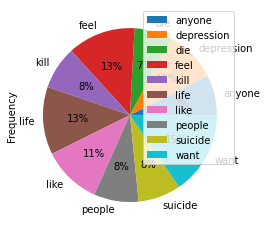

In [27]:
from collections import Counter
p = Counter(" ".join(df['title_clean']).split()).most_common(10)
rslt = pd.DataFrame(p, columns=['Word', 'Frequency'])
print(rslt)

col = rslt['Word'].tolist()

rslt.groupby(['Word']).sum().plot(
    kind='pie', y='Frequency', autopct='%1.0f%%')

#### Top 10 words used in the posts selftext: 

     Word  Frequency
0      wa       4864
1    like       4035
2    want       3887
3    feel       3725
4    life       3586
5    know       2571
6     get       2358
7  people       2241
8    time       2179
9    even       2143


<AxesSubplot:ylabel='Frequency'>

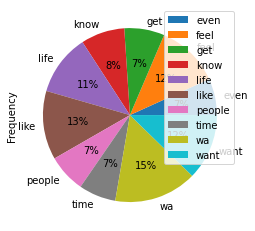

In [28]:
p = Counter(" ".join(df['selftext_clean']).split()).most_common(10)
rslt = pd.DataFrame(p, columns=['Word', 'Frequency'])
print(rslt)

col = rslt['Word'].tolist()

rslt.groupby(['Word']).sum().plot(
    kind='pie', y='Frequency', autopct='%1.0f%%')

### Top Authors of the posts:

In [29]:
df["author"].value_counts().head(10)

SQLwitch                18
adamas105               11
Acceptable_Nobody179     8
FallenJedi5847           7
gayNsadrefrigerator      6
BearComplex20            6
drauch52                 6
TheFilipinoFeline        5
methylphenidate1         5
RottenWorld0             5
Name: author, dtype: int64

Reading the post by top author.

In [34]:
df[["is_suicide","author","title", "selftext" , 'subreddit']][df["author"].isin(['SQLwitch'])].sort_values("author")

,is_suicide,author,title,selftext,subreddit
17,1,SQLwitch,Please remember that NO ACTIVISM of any kind is allowed here. Not today or any day.,"Activism, i.e. advocating or fundraising for social change or raising awareness of social issues...",SuicideWatch
2672,0,SQLwitch,Warning: We're being targeted by a PM-spammer promoting a blog at mentorself.com,"###Update (Friday March 9, 11:45PST): This person has now made several new accounts and is usin...",depression
2663,0,SQLwitch,"Regular Check-In Post. Plus, a reminder about the No-Activism Rule.",Welcome to /r/depression's check-in post - a place to take a moment and share what is going on a...,depression
2581,0,SQLwitch,Warning: Watch out for PMs pushing religion.,**Update: We are aware this person has been PM-ing everyone who's participated in this thread w...,depression
2419,0,SQLwitch,Regular Check-In Post,Welcome to /r/depression's check-in post - a place to take a moment and share what is going on a...,depression
2367,0,SQLwitch,Reminder: NO ACTIVISM is allowed here at any time.,"We know that September 10 was World Suicide Prevention Day. And, we're all for activism. But not...",depression
2117,0,SQLwitch,"Our most-broken and least-understood rules is ""helpers may not invite private contact as a first...",We understand that most people who reply immediately to an OP with an invitation to talk private...,depression
991,1,SQLwitch,Please remember that NO ACTIVISM of any kind is ever allowed here. No matter what day it is.,"Activism, i.e. advocating or fundraising for social change or raising awareness of social issues...",SuicideWatch
990,1,SQLwitch,"New wiki on how to avoid accidentally encouraging suicide, and how to spot covert incitement","We've been seeing a worrying increase in pro-suicide content showing up here and, and also going...",SuicideWatch
707,1,SQLwitch,"WARNING: If you get a PM from /u/itskokobot, please report it and DO NOT REPLY.","We've received word that this account is PM-spamming our OPs. Please be aware that the ""itskoko...",SuicideWatch


Seems like SQLwitch is one of the moderator of the subreddit. We'll check the 2nd top author 'adamas105'

In [36]:
df[["is_suicide","author","title", "selftext" , 'subreddit']][df["author"].isin(['adamas105'])].sort_values("author")

,is_suicide,author,title,selftext,subreddit
1055,1,adamas105,i just want someone to love me,empty post,SuicideWatch
1102,1,adamas105,i wish girl of my dreams just messaged me out of nowere,"Than everything would be fine, but what dreams?\nI dont even have a type anymore.\nI just want s...",SuicideWatch
1114,1,adamas105,i need someone to love me ;(,empty post,SuicideWatch
1182,1,adamas105,need to vent,empty post,SuicideWatch
1213,1,adamas105,"cant find love, im out of options i need to vent",Its 6am,SuicideWatch
1238,1,adamas105,"M18 cant find love, need to vent",I just cant take it anymore,SuicideWatch
1354,1,adamas105,all i waned in this cold world is to hold somebody close.,"i want to end it all, but im too weak so here i go posting here again.\n\ni just waned to love s...",SuicideWatch
1361,1,adamas105,"i just need someone to love me, can i vent pleas","I want cuddles and kisses and love and stuff, i want to spend my time with that special somebody",SuicideWatch
1455,1,adamas105,I just wanted to be loved M18,i keep posting here instead of trying to go out see a train,SuicideWatch
1706,1,adamas105,"I need to vent, i think my lover just ghosted me",empty post,SuicideWatch


We saw a lot of authors entries were NULL so we replaced those columns with 'inactive' users.

In [37]:
df["author"].fillna("inactive",inplace=True)
df[df["author"].isin(["inactive"])].head()

,title,id,author,url,score,subreddit,over_18,selftext,is_suicide,title_clean,selftext_clean,titlelen,selftextlen,title_n_words,selftext_n_words
9,"Dear mom, i really dont care about my grades right now. I'm trying to keep your only son alive.",kgxxg9,inactive,https://www.reddit.com/r/SuicideWatch/comments/kgxxg9/dear_mom_i_really_dont_care_about_my_grade...,2652,SuicideWatch,False,empty post,1,dear mom really dont care grade right trying keep son alive,empty post,59,10,11,2
12,I’ve seen child porn on the internet. I will never be the same again.,g6qx7q,inactive,https://www.reddit.com/r/SuicideWatch/comments/g6qx7q/ive_seen_child_porn_on_the_internet_i_will...,2498,SuicideWatch,False,I saw it on twitter. Multiple accounts. I cybertipped them all. There were so many videos. After...,1,seen child porn internet never,saw twitter multiple account cybertipped many video lost head stop report anymore account want l...,30,486,5,76
20,"Sleep just Isn't sleep anymore, It's an escape.",k7v2yu,inactive,https://www.reddit.com/r/SuicideWatch/comments/k7v2yu/sleep_just_isnt_sleep_anymore_its_an_escape/,2244,SuicideWatch,False,empty post,1,sleep sleep anymore escape,empty post,26,10,4,2
21,I hate how I can turn from being fine to feeling like killing myself in just seconds,of1rir,inactive,https://www.reddit.com/r/SuicideWatch/comments/of1rir/i_hate_how_i_can_turn_from_being_fine_to_f...,2200,SuicideWatch,False,empty post,1,hate turn fine feeling like killing second,empty post,42,10,7,2
22,throwing away my blades today,blfsjb,inactive,https://www.reddit.com/r/SuicideWatch/comments/blfsjb/throwing_away_my_blades_today/,2152,SuicideWatch,False,"been self harming since 12, i’m 22. \n\ni’m 3 days self harm free.\n\ngoing to throw my blades a...",1,throwing away blade today,self harming since 12 22 3 day self harm free going throw blade away today fight good fight wish...,25,107,4,21


In [38]:
df.to_csv('preprocessed_data.csv', index = False)